In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.ticker as ticker
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv", encoding = 'latin1')
data = data.dropna(how="any").reset_index(drop=True)
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884.0,2046.0,1214.0,329.0,43.0,74.0,7.0,10.0,144.0,9.0,2.0,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621.0,1543.0,599.0,333.0,25.0,22.0,5.0,1.0,76.0,26.0,0.0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541.0,2071.0,628.0,500.0,60.0,135.0,4.0,9.0,124.0,12.0,6.0,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749.0,2384.0,857.0,248.0,49.0,155.0,6.0,8.0,159.0,36.0,4.0,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115.0,2609.0,1104.0,178.0,46.0,122.0,6.0,3.0,191.0,31.0,6.0,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [10]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.00,0.60,0.89,0.50,0.43,0.63,0.25,0.48,0.90,0.77,0.80
From Home,0.60,1.00,0.25,0.63,0.25,0.75,0.40,0.62,0.75,0.32,0.48
From Hashtags,0.89,0.25,1.00,0.12,0.26,0.32,0.19,0.25,0.72,0.79,0.68
From Explore,0.50,0.63,0.12,1.00,0.30,0.75,0.03,0.53,0.54,0.14,0.43
From Other,0.43,0.25,0.26,0.30,1.00,0.25,-0.08,0.09,0.34,0.44,0.59
Saves,0.63,0.75,0.32,0.75,0.25,1.00,0.14,0.74,0.76,0.18,0.40
Comments,0.25,0.40,0.19,0.03,-0.08,0.14,1.00,0.18,0.31,0.21,0.10
Shares,0.48,0.62,0.25,0.53,0.09,0.74,0.18,1.00,0.58,0.17,0.30
Likes,0.90,0.75,0.72,0.54,0.34,0.76,0.31,0.58,1.00,0.59,0.64
Profile Visits,0.77,0.32,0.79,0.14,0.44,0.18,0.21,0.17,0.59,1.00,0.87


0.8033123865986985
0.8033123865956648
y = 0.025378387663792988x + 42.4727685071269


(0.0, 469.0054527211184)

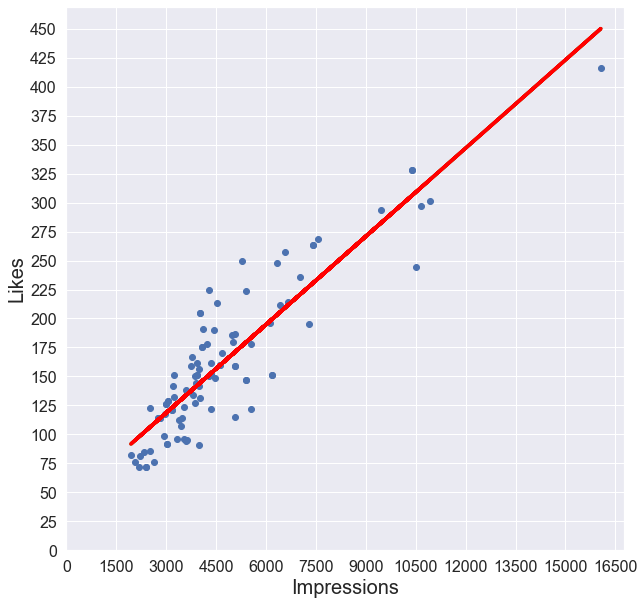

In [71]:
X = "Impressions"
Y = "Likes"
Lin_Reg = LinearRegression(n_jobs=-1).fit(pd.DataFrame(data[X]), data[Y])
# Ridge_Reg = Ridge(alpha=1000).fit(pd.DataFrame(data[X]), data[Y])
print(Lin_Reg.score(pd.DataFrame(data[X]), data[Y]))
print(Ridge_Reg.score(pd.DataFrame(data[X]), data[Y]))
print("y = ", Lin_Reg.coef_[0] ,"x + ",Lin_Reg.intercept_, sep="")

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X, Y, data=data, label=None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(X, fontsize=20)
plt.ylabel(Y, fontsize=20)
plt.plot(pd.DataFrame(data[X]), Lin_Reg.predict(pd.DataFrame(data[X])), 
         label='Linear Regression Line', color="olivedrab", linewidth = 3.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1500))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)

0.40821369119346806
y = 2.2005392632933867x + 133.9713175124651


(0.0, 433.2)

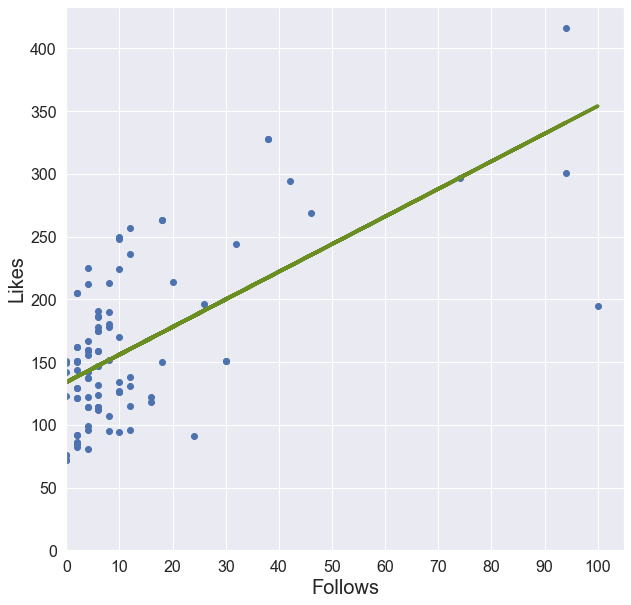

In [61]:
X = "Follows"
Y = "Likes"
Lin_Reg = LinearRegression(n_jobs=-1).fit(pd.DataFrame(data[X]), data[Y])
print(Lin_Reg.score(pd.DataFrame(data[X]), data[Y]))
print("y = ", Lin_Reg.coef_[0] ,"x + ",Lin_Reg.intercept_, sep="")

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X, Y, data=data, label=None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(X, fontsize=20)
plt.ylabel(Y, fontsize=20)
plt.plot(pd.DataFrame(data[X]), Lin_Reg.predict(pd.DataFrame(data[X])), 
         label='Linear Regression Line', color="olivedrab", linewidth = 3.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)

0.5538919741596726
y = 0.0510669740356219x + 1.519136749661075


(0.0, 43.05)

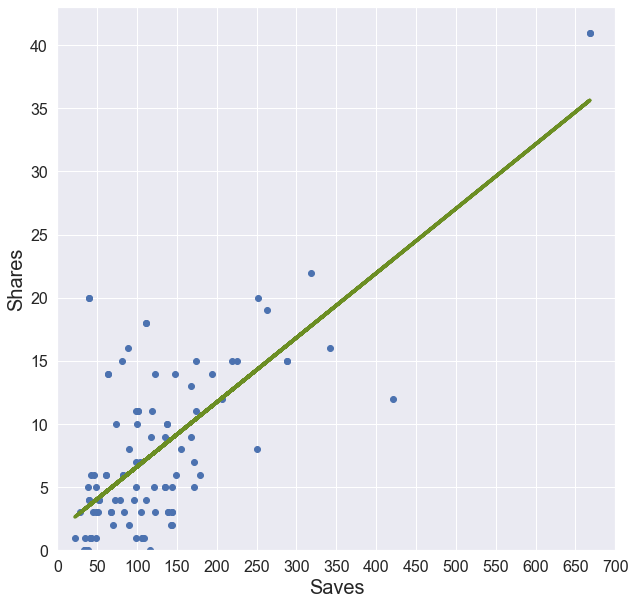

In [62]:
X = "Saves"
Y = "Shares"
Lin_Reg = LinearRegression(n_jobs=-1).fit(pd.DataFrame(data[X]), data[Y])
print(Lin_Reg.score(pd.DataFrame(data[X]), data[Y]))
print("y = ", Lin_Reg.coef_[0] ,"x + ",Lin_Reg.intercept_, sep="")

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X, Y, data=data, label=None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(X, fontsize=20)
plt.ylabel(Y, fontsize=20)
plt.plot(pd.DataFrame(data[X]), Lin_Reg.predict(pd.DataFrame(data[X])), 
         label='Linear Regression Line', color="olivedrab", linewidth = 3.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)

In [21]:
# figure = px.scatter(data_frame=data, x="Impressions", y="Likes", 
#                     size="Likes", trendline="ols", 
#                     title = "Relationship Between Likes and Impressions")
# figure.show()
px.scatter(data_frame=data, x="Impressions", y="Likes", 
           size="Likes", trendline="ols", 
           title = "Relationship Between Likes and Impressions")

<AxesSubplot:title={'center':'Relationship Bewtween Likes & Impressions'}, xlabel='Impressions', ylabel='Likes'>

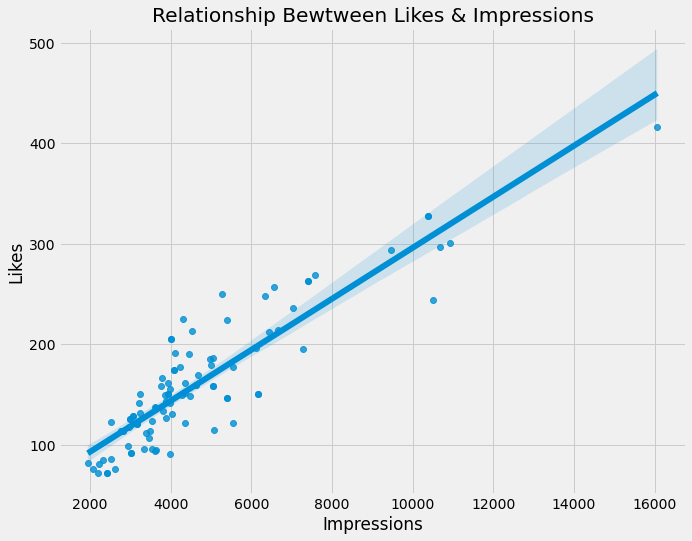

In [22]:
plt.figure(figsize=(10, 8))
# plt.style.use('fivethirtyeight')
plt.title("Relationship Bewtween Likes & Impressions")
sns.regplot(x="Impressions", y="Likes", data=data)
# plt.show()

In [ ]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# https://stackoverflow.com/questions/22642511/change-y-range-to-start-from-0-with-matplotlib
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html




